In [147]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython
import IPython.display as ipd

In [148]:
# load data

y_m, sr_m = librosa.load(
    'c:/nmb/nmb_data/M2_low.wav'
)

y_f, sr_f = librosa.load(
    'c:/nmb/nmb_data/F1_high.wav'
)

In [149]:
# audio -> melspectrogram
# mel_to_audio 하기 전에 melspectrogram 를 해줘야한다

S_m = librosa.feature.melspectrogram(
    y_m, sr = sr_m
)
S_f = librosa.feature.melspectrogram(
    y_f, sr = sr_f
)

In [150]:
# mel_to_audio

mta_m = librosa.feature.inverse.mel_to_audio(
    S_m,
    sr = sr_m,
    n_fft = 512,
    hop_length = 128, # n_fft // 4
    win_length = 512,
    window = 'hann',
    center = True,
    pad_mode = 'reflect',
    power = 2.0,
    n_iter = 32,
    length = None
)

mta_f = librosa.feature.inverse.mel_to_audio(
    S_f,
    sr = sr_f,
    n_fft = 512,
    hop_length = 128,
    win_length = 512,
    window = 'hann',
    center = True,
    pad_mode = 'reflect',
    power = 2.0,
    n_iter = 32,
    length = None
)

In [151]:
print('mta_m : \n', mta_m)
print('mta_f : \n', mta_f)
print(mta_m.shape)
print(mta_f.shape)

mta_m : 
 [-0.00527769 -0.00519874 -0.00439623 ... -0.00121885  0.00676863
  0.01553228]
mta_f : 
 [ 0.0021455   0.00243366  0.00291365 ... -0.00337781 -0.0022663
 -0.00329745]
(27520,)
(27520,)


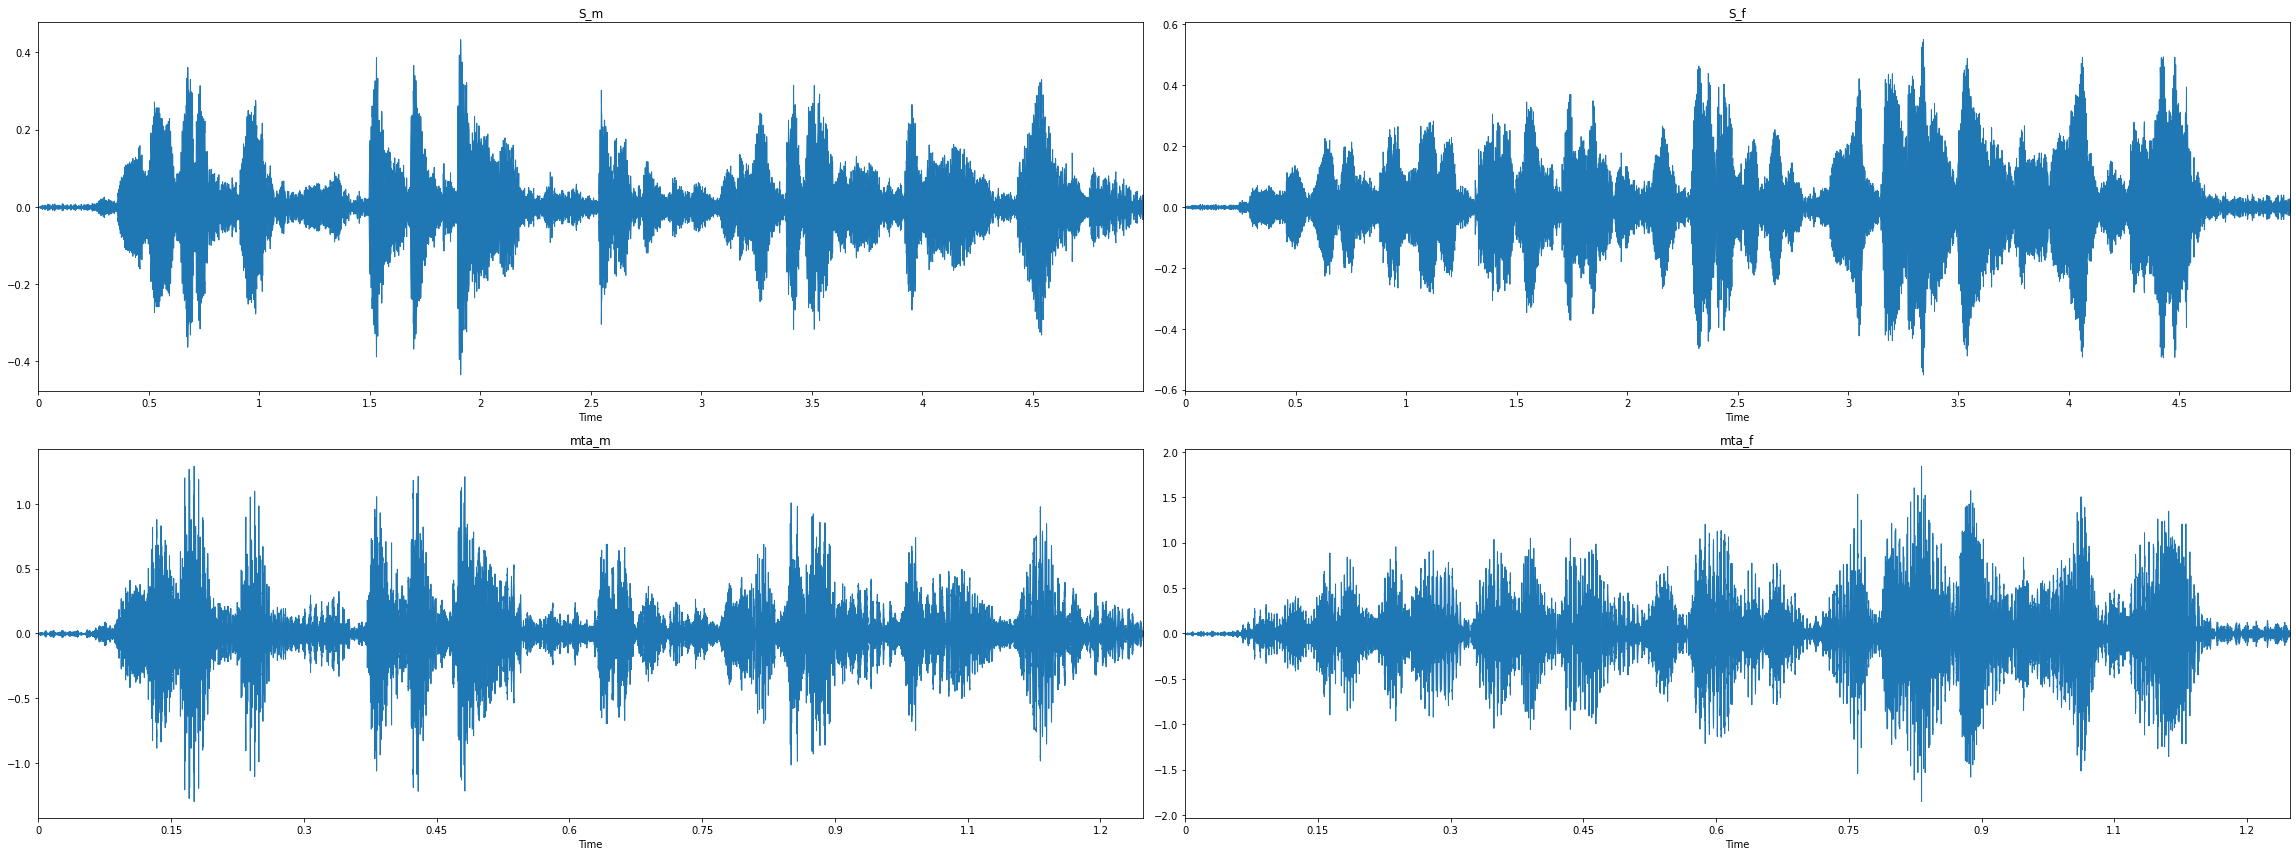

In [152]:
# visualization

fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.waveplot(
    y_m, sr = sr_m, ax = ax1
)
ax1.set(title = 'S_m')

librosa.display.waveplot(
    y_f, sr = sr_f, ax = ax2
)
ax2.set(title = 'S_f')

librosa.display.waveplot(
    mta_m, sr = sr_m, ax = ax3
)
ax3.set(title = 'mta_m')

librosa.display.waveplot(
    mta_f, sr = sr_f, ax = ax4
)
ax4.set(title = 'mta_f')

fig.tight_layout()
plt.show()

In [153]:
# zero_crossingrate

list = [y_m, mta_m, y_f, mta_f]

for i in list:
    zerocrossing_rate = librosa.zero_crossings(i, pad = False)
    print(sum(zerocrossing_rate))

9286
2357
6492
1567


In [154]:
# import soundfile as sf

# sf.write(
#     'c:/nmb/nmb_data/mta_주형.wav', mta_m, sr_m
# )

In [210]:
# mel_to_audio_change parameter

mta_m_C = librosa.feature.inverse.mel_to_audio(
    S_m,
    sr = sr_m,
    n_fft = 512,
    hop_length = 512//4, # n_fft // 4
    win_length = 512,
    window = 'hann',
    center = True,
    pad_mode = 'reflect',
    power = 2.0,
    n_iter = 32,
    length = 27250
)

mta_f_C = librosa.feature.inverse.mel_to_audio(
    S_f,
    sr = sr_f,
    n_fft = 512,
    hop_length = 512//4,
    win_length = 512,
    window = 'hann',
    center = True,
    pad_mode = 'reflect',
    power = 2.0,
    n_iter = 32,
    length = 100
)

ValueError: could not broadcast input array from shape (1025,54) into shape (1025,216)

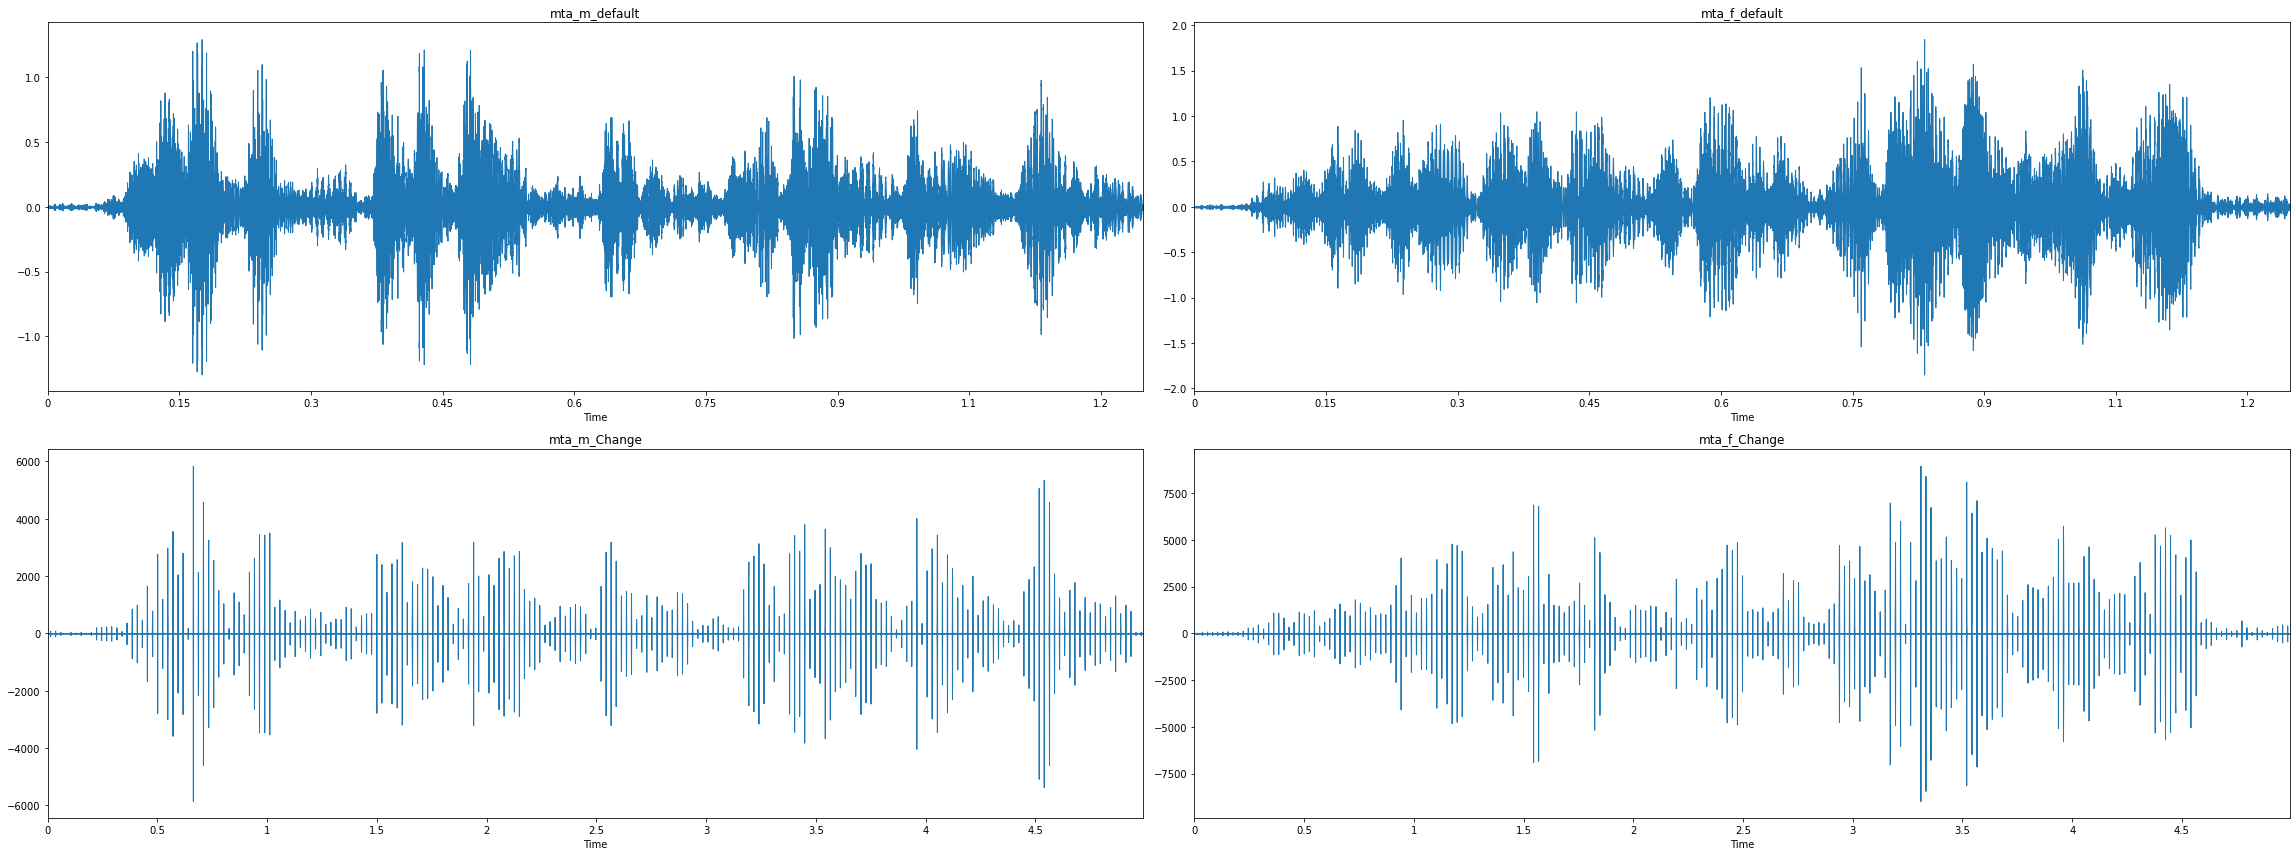

In [205]:
fig = plt.figure(figsize = (32, 12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

librosa.display.waveplot(
    mta_m, sr = sr_m, x_axis = 'time', ax = ax1
)
ax1.set(title = 'mta_m_default')

librosa.display.waveplot(
    mta_f, sr = sr_f, x_axis = 'time', ax = ax2
)
ax2.set(title = 'mta_f_default')

librosa.display.waveplot(
    mta_m_C, sr = sr_m, x_axis = 'time', ax = ax3
)
ax3.set(title = 'mta_m_Change')

librosa.display.waveplot(
    mta_f_C, sr = sr_f, x_axis = 'time' , ax = ax4
)
ax4.set(title = 'mta_f_Change')

fig.tight_layout()
plt.show()

In [179]:
print(np.min(mta_m), np.max(mta_m))
print(np.min(mta_m_C), np.max(mta_m_C))
print(np.min(mta_f), np.max(mta_f))
print(np.min(mta_f_C), np.max(mta_f_C))

-1.2944014 1.2708806
-0.01344303 0.002526641
-1.8453422 1.5358262
-0.00994069 0.0056371638


In [207]:
sf.write(
    'c:/nmb/nmb_data/mel_to_audio_empty.wav', mta_m_C, sr_m
)

In [209]:
print(len(mta_m))
print(len(mta_m_C))

27520
100
